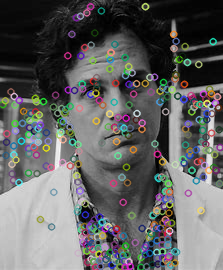

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('banner.jpg', cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)
cv2_imshow( img_with_keypoints)
cv2.waitKey(0)



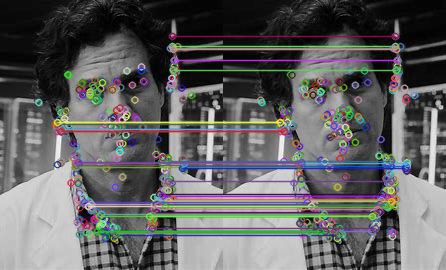

In [ ]:
import cv2

img = cv2.imread('banner.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image not loaded. Check the file path.")
else:
    orb = cv2.ORB_create()

    keypoints, descriptors = orb.detectAndCompute(img, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors, descriptors)

    matches = sorted(matches, key=lambda x: x.distance)

    matched_img = cv2.drawMatches(img, keypoints, img, keypoints, matches[:50], None)
    cv2_imshow(matched_img)
    cv2.waitKey(0)

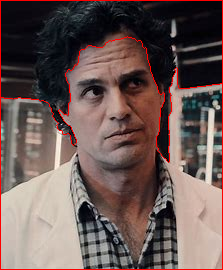

In [ ]:
import cv2
import numpy as np

image = cv2.imread('banner.jpg')
if image is None:
    print("Error: Image not loaded. Check the file path.")
else:

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


    sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)
    unknown = cv2.subtract(sure_bg, np.uint8(sure_fg))

    markers = cv2.connectedComponents(np.uint8(sure_fg))[1]
    markers = markers + 1
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]

    cv2_imshow(image)
    cv2.waitKey(0)